In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv(r'D:\regtask1\StudentsPerformance.csv')

In [3]:
df['parental level of education'].value_counts()
df['test preparation course'].value_counts()
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

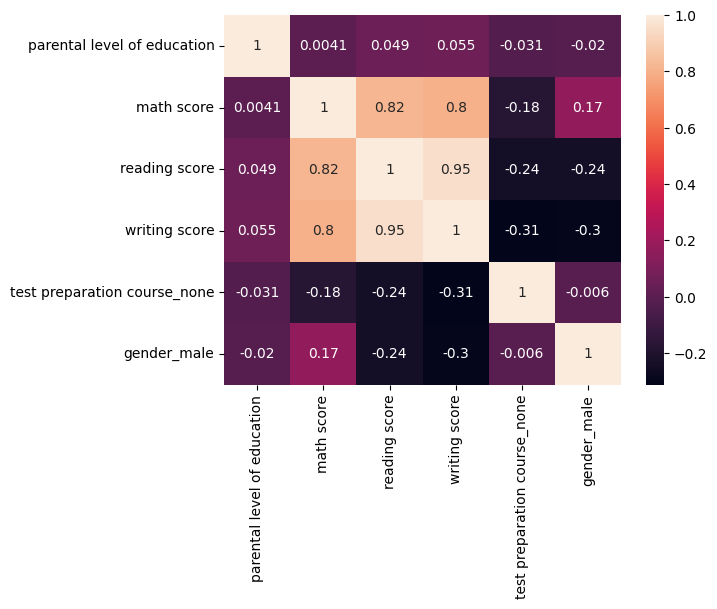

In [23]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.show()

In [5]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
display(df['reading score'].skew())
display(df['writing score'].skew())

np.float64(-0.25910451810923063)

np.float64(-0.28944397150761897)

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df = pd.get_dummies(df, columns=['test preparation course'], drop_first=True)

In [9]:
df=pd.get_dummies(df,columns=['gender'],drop_first=True)
df['gender_male']=df['gender_male'].astype(int)

In [10]:
df.head(5)

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,test preparation course_none,gender_male
0,group B,bachelor's degree,standard,72,72,74,True,0
1,group C,some college,standard,69,90,88,False,0
2,group B,master's degree,standard,90,95,93,True,0
3,group A,associate's degree,free/reduced,47,57,44,True,1
4,group C,some college,standard,76,78,75,True,1


In [11]:
df['test preparation course_none']=df['test preparation course_none'].astype(int)

In [12]:
df['parental level of education'] = df['parental level of education'].map({
   "some college":0,
"associate's degree":1,
"high school":2,
"some high school" :3,
"bachelor's degree" :4,
"master's degree":5
})


In [13]:
df['parental level of education'].head(5)

0    4
1    0
2    5
3    1
4    0
Name: parental level of education, dtype: int64

In [14]:
df.head(5)

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,test preparation course_none,gender_male
0,group B,4,standard,72,72,74,1,0
1,group C,0,standard,69,90,88,0,0
2,group B,5,standard,90,95,93,1,0
3,group A,1,free/reduced,47,57,44,1,1
4,group C,0,standard,76,78,75,1,1


In [15]:
X=df[['parental level of education','test preparation course_none','reading score','writing score','gender_male']]
y=df['math score']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
model=LinearRegression()
model.fit(x_train,y_train)
pred_y=model.predict(x_test)

In [19]:
print(model.coef_)

[-0.37781238  3.44722551  0.27432983  0.72493586 13.47078968]


In [20]:
print(r2_score(y_test,pred_y))

0.8752065866025954


In [21]:
predicted_value=model.predict([[1,0,85,80,0]])

d:\regtask1\myvenev\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
print(predicted_value)

[70.81829739]
